# House Prices: Advanced Regression Techniques

In [64]:
import math
import numpy as np
import pandas as pd
from datetime import datetime

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
plt.style.use('seaborn-whitegrid')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import statsmodels.api as sm

In [65]:
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
group_names = ['bin0', 'bin1', 'bin2', 'bin3', 'bin4', 'bin5', 'bin6', 'bin7', 'bin8', 'bin9']

# Get the Data

In [66]:
#train data 
train = pd.read_csv('house_prices_train.csv')
train['label']="train"
train.info()
train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 82 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,label
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,train
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,train
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,train
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,train
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,train


In [67]:
#test data 
test = pd.read_csv('house_prices_test.csv')
test['label']="test"
test.info()
test.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 81 columns):
Id               1459 non-null int64
MSSubClass       1459 non-null int64
MSZoning         1455 non-null object
LotFrontage      1232 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null object
Alley            107 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1457 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1458 non-

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,label
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,test
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,test
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,test
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,test
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,NaN,0,1,2010,WD,Normal,test


In [68]:
#full dataset
df = pd.concat([train,test],axis=0)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 82 columns):
1stFlrSF         2919 non-null int64
2ndFlrSF         2919 non-null int64
3SsnPorch        2919 non-null int64
Alley            198 non-null object
BedroomAbvGr     2919 non-null int64
BldgType         2919 non-null object
BsmtCond         2837 non-null object
BsmtExposure     2837 non-null object
BsmtFinSF1       2918 non-null float64
BsmtFinSF2       2918 non-null float64
BsmtFinType1     2840 non-null object
BsmtFinType2     2839 non-null object
BsmtFullBath     2917 non-null float64
BsmtHalfBath     2917 non-null float64
BsmtQual         2838 non-null object
BsmtUnfSF        2918 non-null float64
CentralAir       2919 non-null object
Condition1       2919 non-null object
Condition2       2919 non-null object
Electrical       2918 non-null object
EnclosedPorch    2919 non-null int64
ExterCond        2919 non-null object
ExterQual        2919 non-null object
Exterior1st      291

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,label
0,856,854,0,NaN,3,1Fam,TA,No,706.0,0.0,...,0,Pave,8,856.0,AllPub,0,2003,2003,2008,train
1,1262,0,0,NaN,3,1Fam,TA,Gd,978.0,0.0,...,0,Pave,6,1262.0,AllPub,298,1976,1976,2007,train
2,920,866,0,NaN,3,1Fam,TA,Mn,486.0,0.0,...,0,Pave,6,920.0,AllPub,0,2001,2002,2008,train
3,961,756,0,NaN,3,1Fam,Gd,No,216.0,0.0,...,0,Pave,7,756.0,AllPub,0,1915,1970,2006,train
4,1145,1053,0,NaN,4,1Fam,TA,Av,655.0,0.0,...,0,Pave,9,1145.0,AllPub,192,2000,2000,2008,train


# Exploratory Data Analysis

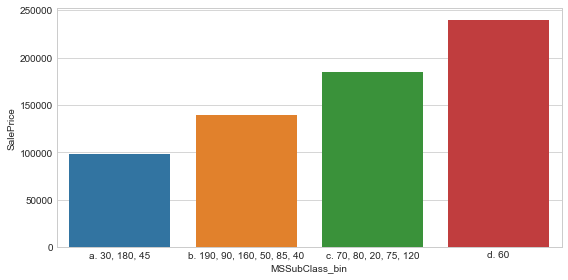

In [69]:
#MSSubClass_bin
def func_bin (x):
    if x in (30, 180, 45): return 'a. 30, 180, 45'
    elif x in (190, 90, 160, 50, 85, 40): return 'b. 190, 90, 160, 50, 85, 40'
    elif x in (70, 80, 20, 75, 120): return 'c. 70, 80, 20, 75, 120'
    else: return 'd. 60'
df['MSSubClass_bin'] = df['MSSubClass'].apply(func_bin)

temp = df[df['label']=='train']
temp = pd.DataFrame(temp.groupby(['MSSubClass_bin'], axis=0, as_index=False)['SalePrice'].mean())
plt.figure(figsize=(8,4))
sns.barplot(x='MSSubClass_bin', y='SalePrice', data=temp)
plt.tight_layout()

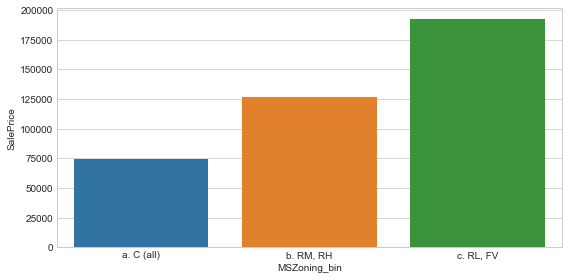

In [70]:
#MSZoning_bin
def func_bin (x):
    if x in ['C (all)']: return 'a. C (all)'
    elif x in ['RM','RH']: return 'b. RM, RH'
    else: return 'c. RL, FV'
df['MSZoning_bin'] = df['MSZoning'].apply(func_bin)

temp = df[df['label']=='train']
temp = pd.DataFrame(temp.groupby(['MSZoning_bin'], axis=0, as_index=False)['SalePrice'].mean())
plt.figure(figsize=(8,4))
sns.barplot(x='MSZoning_bin', y='SalePrice', data=temp)
plt.tight_layout()

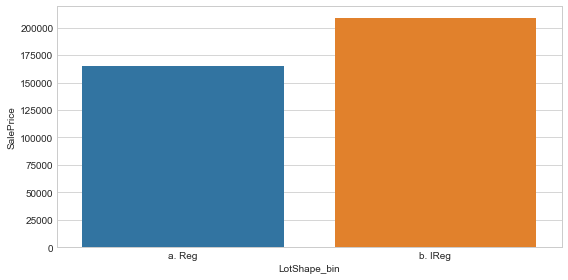

In [71]:
#LotShape_bin
def func_bin (x):
    if x in ['Reg']: return 'a. Reg'
    else: return 'b. IReg'
df['LotShape_bin'] = df['LotShape'].apply(func_bin)

temp = df[df['label']=='train']
temp = pd.DataFrame(temp.groupby(['LotShape_bin'], axis=0, as_index=False)['SalePrice'].mean())
plt.figure(figsize=(8,4))
sns.barplot(x='LotShape_bin', y='SalePrice', data=temp)
plt.tight_layout()

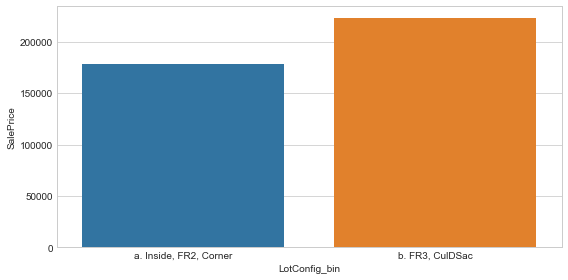

In [72]:
#LotConfig_bin
def func_bin (x):
    if x in ['Inside','FR2','Corner']: return 'a. Inside, FR2, Corner'
    else: return 'b. FR3, CulDSac'
df['LotConfig_bin'] = df['LotConfig'].apply(func_bin)

temp = df[df['label']=='train']
temp = pd.DataFrame(temp.groupby(['LotConfig_bin'], axis=0, as_index=False)['SalePrice'].mean())
plt.figure(figsize=(8,4))
sns.barplot(x='LotConfig_bin', y='SalePrice', data=temp)
plt.tight_layout()

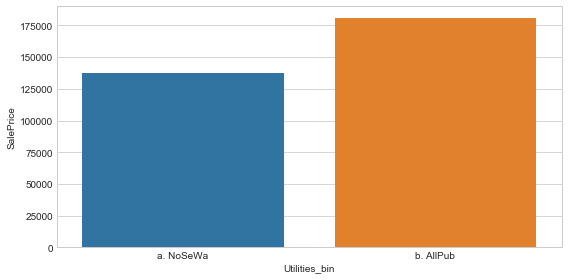

In [73]:
#Utilities_bin
def func_bin (x):
    if x in ['NoSeWa']: return 'a. NoSeWa'
    else: return 'b. AllPub'
df['Utilities_bin'] = df['Utilities'].apply(func_bin)

temp = df[df['label']=='train']
temp = pd.DataFrame(temp.groupby(['Utilities_bin'], axis=0, as_index=False)['SalePrice'].mean())
plt.figure(figsize=(8,4))
sns.barplot(x='Utilities_bin', y='SalePrice', data=temp)
plt.tight_layout()

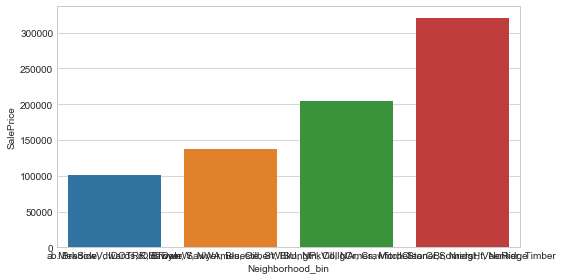

In [74]:
#Neighborhood_bin
def func_bin (x):
    if x in ['MeadowV','IDOTRR','BrDale']: return 'a. MeadowV, IDOTRR, BrDale'
    elif x in ['BrkSide','Edwards','OldTown','Sawyer','Blueste','SWISU','NPkVill','NAmes','Mitchel']: return 'b. BrkSide, dwards, OldTown, Sawyer, Blueste, SWISU, NPkVill, NAmes, Mitchel' 
    elif x in ['SawyerW','NWAmes','Gilbert','Blmngtn','CollgCr','Crawfor','ClearCr','Somerst','Veenker','Timber']: return 'c. SawyerW, NWAmes, Gilbert, Blmngtn, CollgCr, Crawfor, ClearCr,Somerst, Veenker, Timber' 
    else: return 'd. StoneBr, NridgHt, NoRidge'
df['Neighborhood_bin'] = df['Neighborhood'].apply(func_bin)

temp = df[df['label']=='train']
temp = pd.DataFrame(temp.groupby(['Neighborhood_bin'], axis=0, as_index=False)['SalePrice'].mean())
plt.figure(figsize=(8,4))
sns.barplot(x='Neighborhood_bin', y='SalePrice', data=temp)
plt.tight_layout()

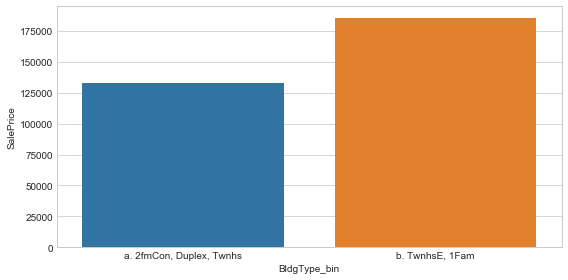

In [75]:
#BldgType_bin
def func_bin (x):
    if x in ['2fmCon','Duplex','Twnhs']: return 'a. 2fmCon, Duplex, Twnhs'
    else: return 'b. TwnhsE, 1Fam'
df['BldgType_bin'] = df['BldgType'].apply(func_bin)

temp = df[df['label']=='train']
temp = pd.DataFrame(temp.groupby(['BldgType_bin'], axis=0, as_index=False)['SalePrice'].mean())
plt.figure(figsize=(8,4))
sns.barplot(x='BldgType_bin', y='SalePrice', data=temp)
plt.tight_layout()

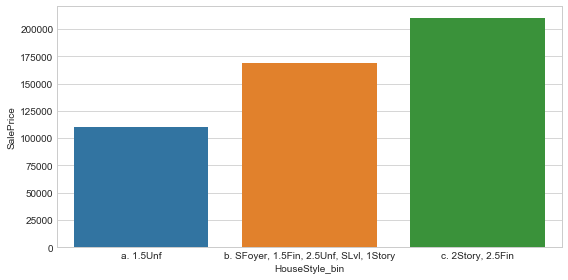

In [76]:
#HouseStyle_bin
def func_bin (x):
    if x in ['1.5Unf']: return 'a. 1.5Unf'
    elif x in ['SFoyer','1.5Fin','2.5Unf','SLvl','1Story']: return 'b. SFoyer, 1.5Fin, 2.5Unf, SLvl, 1Story'
    else: return 'c. 2Story, 2.5Fin'
df['HouseStyle_bin'] = df['HouseStyle'].apply(func_bin)

temp = df[df['label']=='train']
temp = pd.DataFrame(temp.groupby(['HouseStyle_bin'], axis=0, as_index=False)['SalePrice'].mean())
plt.figure(figsize=(8,4))
sns.barplot(x='HouseStyle_bin', y='SalePrice', data=temp)
plt.tight_layout()

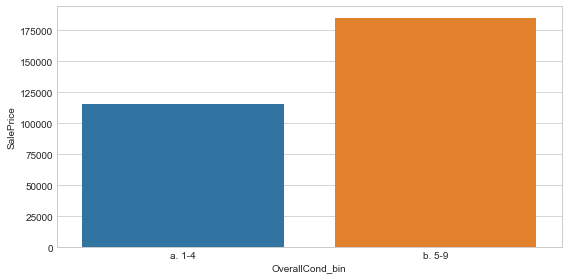

In [77]:
#OverallCond_bin
def func_bin (x):
    if x < 5: return 'a. 1-4'
    else: return 'b. 5-9'
df['OverallCond_bin'] = df['OverallCond'].apply(func_bin)

temp = df[df['label']=='train']
temp = pd.DataFrame(temp.groupby(['OverallCond_bin'], axis=0, as_index=False)['SalePrice'].mean())
plt.figure(figsize=(8,4))
sns.barplot(x='OverallCond_bin', y='SalePrice', data=temp)
plt.tight_layout()

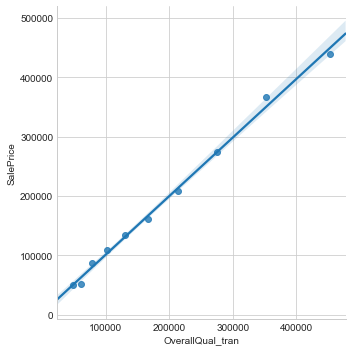

In [78]:
#OverallQual_tran
def func_tran (x):
    return 37490 * math.exp(0.2491 * x)
df['OverallQual_tran'] = df['OverallQual'].apply(func_tran)

temp = df[df['label']=='train']
temp = pd.DataFrame(temp.groupby(['OverallQual'], axis=0, as_index=False)[['SalePrice','OverallQual_tran']].mean())
plt.figure(figsize=(8,4))
sns.lmplot(x='OverallQual_tran', y='SalePrice', data=temp)
plt.tight_layout()

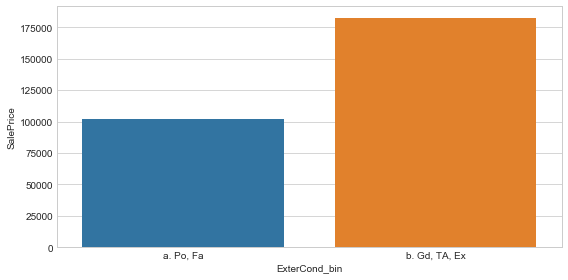

In [79]:
#ExterCond_bin
def func_bin (x):
    if x in ['Po','Fa']: return 'a. Po, Fa'
    else: return 'b. Gd, TA, Ex'
df['ExterCond_bin'] = df['ExterCond'].apply(func_bin)

temp = df[df['label']=='train']
temp = pd.DataFrame(temp.groupby(['ExterCond_bin'], axis=0, as_index=False)['SalePrice'].mean())
plt.figure(figsize=(8,4))
sns.barplot(x='ExterCond_bin', y='SalePrice', data=temp)
plt.tight_layout()

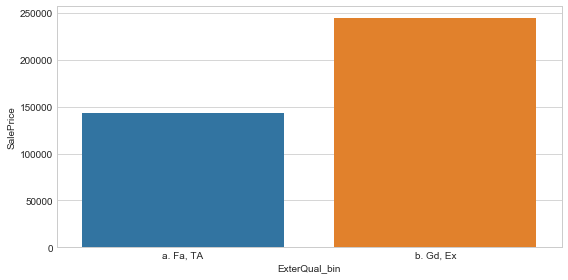

In [80]:
#ExterQual_bin
def func_bin (x):
    if x in ['Fa','TA']: return 'a. Fa, TA'
    else: return 'b. Gd, Ex'
df['ExterQual_bin'] = df['ExterQual'].apply(func_bin)

temp = df[df['label']=='train']
temp = pd.DataFrame(temp.groupby(['ExterQual_bin'], axis=0, as_index=False)['SalePrice'].mean())
plt.figure(figsize=(8,4))
sns.barplot(x='ExterQual_bin', y='SalePrice', data=temp)
plt.tight_layout()

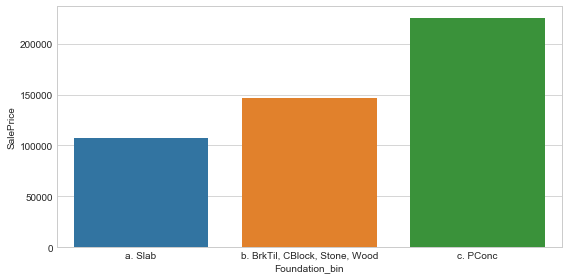

In [81]:
#Foundation_bin
def func_bin (x):
    if x in ['Slab']: return 'a. Slab'
    elif x in ['BrkTil','CBlock','Stone','Wood']: return 'b. BrkTil, CBlock, Stone, Wood'
    else: return 'c. PConc'
df['Foundation_bin'] = df['Foundation'].apply(func_bin)

temp = df[df['label']=='train']
temp = pd.DataFrame(temp.groupby(['Foundation_bin'], axis=0, as_index=False)['SalePrice'].mean())
plt.figure(figsize=(8,4))
sns.barplot(x='Foundation_bin', y='SalePrice', data=temp)
plt.tight_layout()

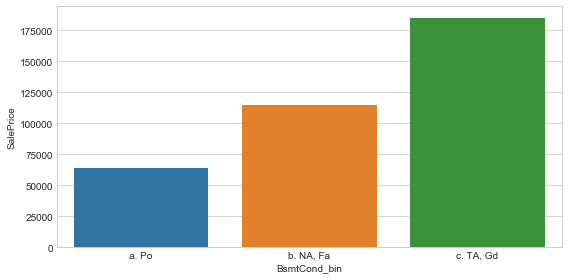

In [82]:
#BsmtCond_bin
def func_bin (x):
    if x in ['Po']: return 'a. Po'
    elif x in ['NA','Fa',np.NaN]: return 'b. NA, Fa'
    else: return 'c. TA, Gd'
df['BsmtCond_bin'] = df['BsmtCond'].apply(func_bin)

temp = df[df['label']=='train']
temp = pd.DataFrame(temp.groupby(['BsmtCond_bin'], axis=0, as_index=False)['SalePrice'].mean())
plt.figure(figsize=(8,4))
sns.barplot(x='BsmtCond_bin', y='SalePrice', data=temp)
plt.tight_layout()

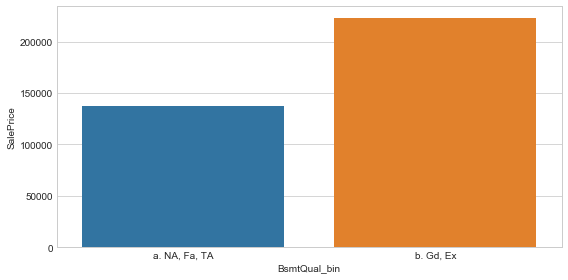

In [83]:
#BsmtQual_bin
def func_bin (x):
    if x in ['NA','Fa','TA',np.NaN]: return 'a. NA, Fa, TA'
    else: return 'b. Gd, Ex'
df['BsmtQual_bin'] = df['BsmtQual'].apply(func_bin)

temp = df[df['label']=='train']
temp = pd.DataFrame(temp.groupby(['BsmtQual_bin'], axis=0, as_index=False)['SalePrice'].mean())
plt.figure(figsize=(8,4))
sns.barplot(x='BsmtQual_bin', y='SalePrice', data=temp)
plt.tight_layout()

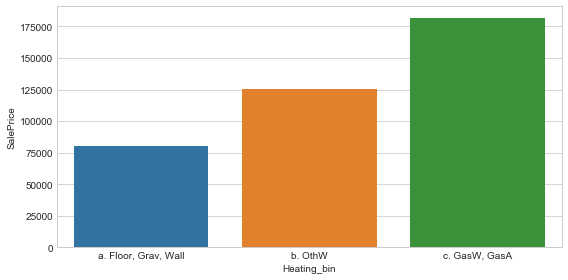

In [84]:
#Heating_bin
def func_bin (x):
    if x in ['Floor','Grav','Wall']: return 'a. Floor, Grav, Wall'
    elif x in ['OthW']: return 'b. OthW'
    else: return 'c. GasW, GasA'
df['Heating_bin'] = df['Heating'].apply(func_bin)

temp = df[df['label']=='train']
temp = pd.DataFrame(temp.groupby(['Heating_bin'], axis=0, as_index=False)['SalePrice'].mean())
plt.figure(figsize=(8,4))
sns.barplot(x='Heating_bin', y='SalePrice', data=temp)
plt.tight_layout()

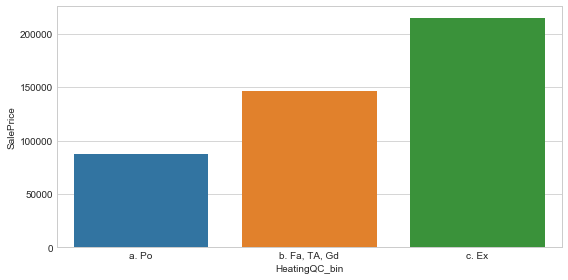

In [85]:
#HeatingQC_bin
def func_bin (x):
    if x in ['Po']: return 'a. Po'
    elif x in ['Fa','TA','Gd']: return 'b. Fa, TA, Gd'
    else: return 'c. Ex'
df['HeatingQC_bin'] = df['HeatingQC'].apply(func_bin)

temp = df[df['label']=='train']
temp = pd.DataFrame(temp.groupby(['HeatingQC_bin'], axis=0, as_index=False)['SalePrice'].mean())
plt.figure(figsize=(8,4))
sns.barplot(x='HeatingQC_bin', y='SalePrice', data=temp)
plt.tight_layout()

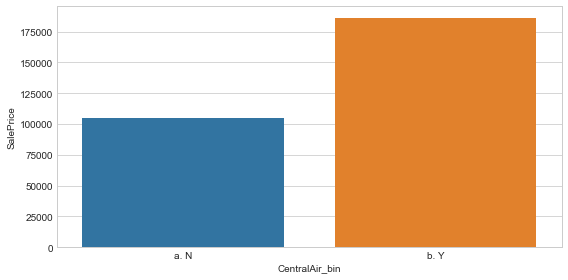

In [86]:
#CentralAir_bin
def func_bin (x):
    if x in ['N']: return 'a. N'
    else: return 'b. Y'
df['CentralAir_bin'] = df['CentralAir'].apply(func_bin)

temp = df[df['label']=='train']
temp = pd.DataFrame(temp.groupby(['CentralAir_bin'], axis=0, as_index=False)['SalePrice'].mean())
plt.figure(figsize=(8,4))
sns.barplot(x='CentralAir_bin', y='SalePrice', data=temp)
plt.tight_layout()

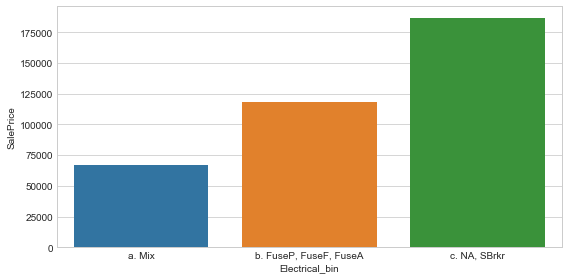

In [87]:
#Electrical_bin
def func_bin (x):
    if x in ['Mix']: return 'a. Mix'
    elif x in ['FuseP','FuseF','FuseA']: return 'b. FuseP, FuseF, FuseA'
    else: return 'c. NA, SBrkr'
df['Electrical_bin'] = df['Electrical'].apply(func_bin)

temp = df[df['label']=='train']
temp = pd.DataFrame(temp.groupby(['Electrical_bin'], axis=0, as_index=False)['SalePrice'].mean())
plt.figure(figsize=(8,4))
sns.barplot(x='Electrical_bin', y='SalePrice', data=temp)
plt.tight_layout()

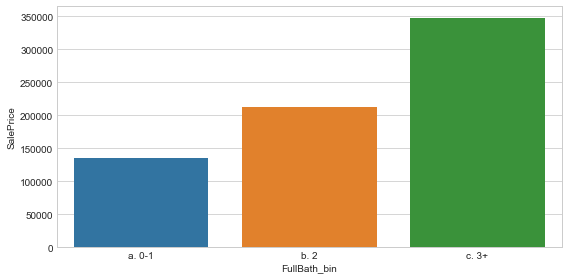

In [88]:
#FullBath_bin
def func_bin (x):
    if x <= 1: return 'a. 0-1'
    elif x == 2: return 'b. 2'
    else: return 'c. 3+'
df['FullBath_bin'] = df['FullBath'].apply(func_bin)

temp = df[df['label']=='train']
temp = pd.DataFrame(temp.groupby(['FullBath_bin'], axis=0, as_index=False)['SalePrice'].mean())
plt.figure(figsize=(8,4))
sns.barplot(x='FullBath_bin', y='SalePrice', data=temp)
plt.tight_layout()

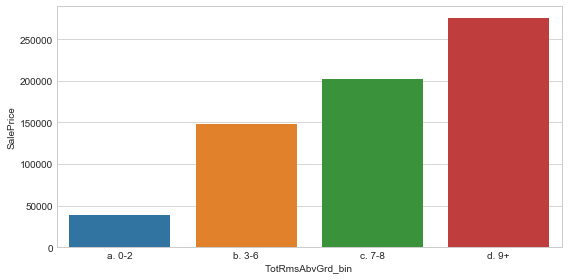

In [89]:
#TotRmsAbvGrd_bin
def func_bin (x):
    if x <= 2: return 'a. 0-2'
    elif x <= 6: return 'b. 3-6'
    elif x <= 8: return 'c. 7-8'
    else: return 'd. 9+'
df['TotRmsAbvGrd_bin'] = df['TotRmsAbvGrd'].apply(func_bin)

temp = df[df['label']=='train']
temp = pd.DataFrame(temp.groupby(['TotRmsAbvGrd_bin'], axis=0, as_index=False)['SalePrice'].mean())
plt.figure(figsize=(8,4))
sns.barplot(x='TotRmsAbvGrd_bin', y='SalePrice', data=temp)
plt.tight_layout()

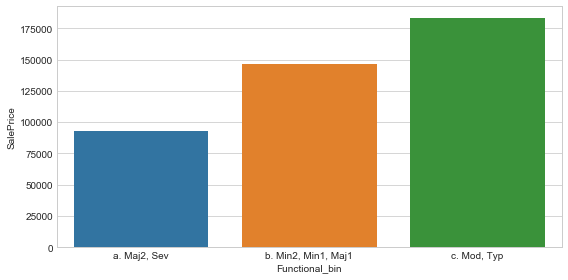

In [90]:
#Functional_bin
def func_bin (x):
    if x in ['Maj2','Sev']: return 'a. Maj2, Sev'
    elif x in ['Min2','Min1','Maj1']: return 'b. Min2, Min1, Maj1'
    else: return 'c. Mod, Typ'
df['Functional_bin'] = df['Functional'].apply(func_bin)

temp = df[df['label']=='train']
temp = pd.DataFrame(temp.groupby(['Functional_bin'], axis=0, as_index=False)['SalePrice'].mean())
plt.figure(figsize=(8,4))
sns.barplot(x='Functional_bin', y='SalePrice', data=temp)
plt.tight_layout()

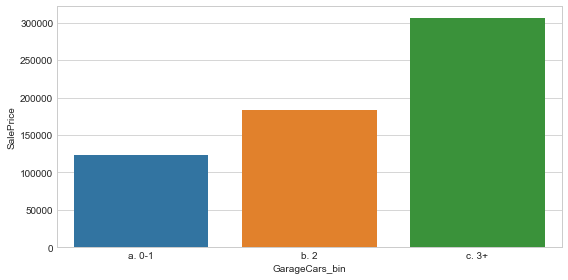

In [91]:
#GarageCars_bin
def func_bin (x):
    if x <= 1: return 'a. 0-1'
    elif x == 2: return 'b. 2'
    else: return 'c. 3+'
df['GarageCars_bin'] = df['GarageCars'].apply(func_bin)

temp = df[df['label']=='train']
temp = pd.DataFrame(temp.groupby(['GarageCars_bin'], axis=0, as_index=False)['SalePrice'].mean())
plt.figure(figsize=(8,4))
sns.barplot(x='GarageCars_bin', y='SalePrice', data=temp)
plt.tight_layout()

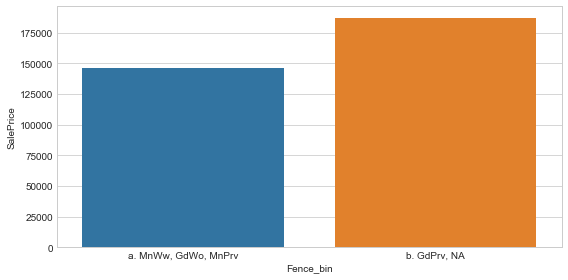

In [92]:
#Fence_bin
def func_bin (x):
    if x in ['MnWw','GdWo','MnPrv']: return 'a. MnWw, GdWo, MnPrv'
    else: return 'b. GdPrv, NA'
df['Fence_bin'] = df['Fence'].apply(func_bin)

temp = df[df['label']=='train']
temp = pd.DataFrame(temp.groupby(['Fence_bin'], axis=0, as_index=False)['SalePrice'].mean())
plt.figure(figsize=(8,4))
sns.barplot(x='Fence_bin', y='SalePrice', data=temp)
plt.tight_layout()

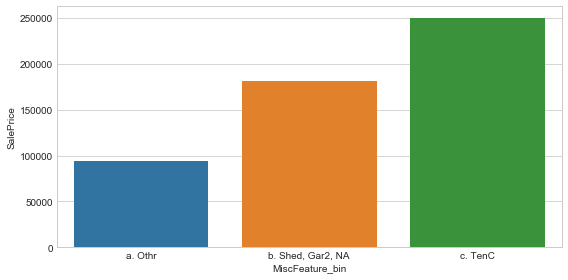

In [93]:
#MiscFeature_bin
def func_bin (x):
    if x in ['Othr']: return 'a. Othr'
    elif x in ['Shed','Gar2','NA',np.NaN]: return 'b. Shed, Gar2, NA'
    else: return 'c. TenC'
df['MiscFeature_bin'] = df['MiscFeature'].apply(func_bin)

temp = df[df['label']=='train']
temp = pd.DataFrame(temp.groupby(['MiscFeature_bin'], axis=0, as_index=False)['SalePrice'].mean())
plt.figure(figsize=(8,4))
sns.barplot(x='MiscFeature_bin', y='SalePrice', data=temp)
plt.tight_layout()

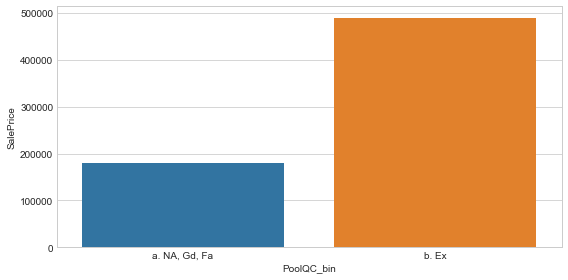

In [94]:
#PoolQC_bin
def func_bin (x):
    if x in ['NA','Gd','Fa',np.NaN]: return 'a. NA, Gd, Fa'
    else: return 'b. Ex'
df['PoolQC_bin'] = df['PoolQC'].apply(func_bin)

temp = df[df['label']=='train']
temp = pd.DataFrame(temp.groupby(['PoolQC_bin'], axis=0, as_index=False)['SalePrice'].mean())
plt.figure(figsize=(8,4))
sns.barplot(x='PoolQC_bin', y='SalePrice', data=temp)
plt.tight_layout()

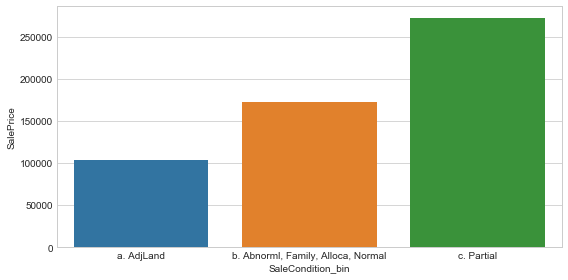

In [95]:
#SaleCondition_bin
def func_bin (x):
    if x in ['AdjLand']: return 'a. AdjLand'
    elif x in ['Abnorml','Family','Alloca','Normal']: return 'b. Abnorml, Family, Alloca, Normal'
    else: return 'c. Partial'
df['SaleCondition_bin'] = df['SaleCondition'].apply(func_bin)

temp = df[df['label']=='train']
temp = pd.DataFrame(temp.groupby(['SaleCondition_bin'], axis=0, as_index=False)['SalePrice'].mean())
plt.figure(figsize=(8,4))
sns.barplot(x='SaleCondition_bin', y='SalePrice', data=temp)
plt.tight_layout()

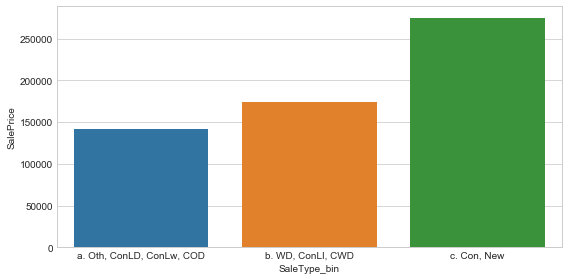

In [96]:
#SaleType_bin
def func_bin (x):
    if x in ['Oth','ConLD','ConLw','COD']: return 'a. Oth, ConLD, ConLw, COD'
    elif x in ['WD','ConLI','CWD']: return 'b. WD, ConLI, CWD'
    else: return 'c. Con, New'
df['SaleType_bin'] = df['SaleType'].apply(func_bin)

temp = df[df['label']=='train']
temp = pd.DataFrame(temp.groupby(['SaleType_bin'], axis=0, as_index=False)['SalePrice'].mean())
plt.figure(figsize=(8,4))
sns.barplot(x='SaleType_bin', y='SalePrice', data=temp)
plt.tight_layout()

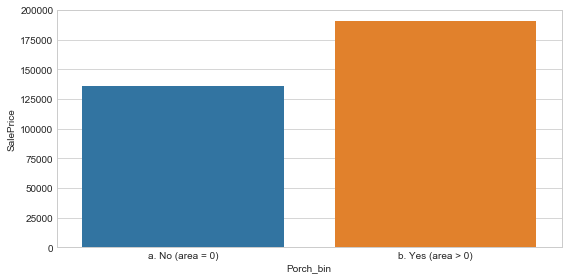

In [97]:
#Porch_bin
df['Porch'] = df['WoodDeckSF']+df['OpenPorchSF']+df['EnclosedPorch']+df['3SsnPorch']+df['ScreenPorch']
def func_bin (x):
    if x == 0: return 'a. No (area = 0)'
    else: return 'b. Yes (area > 0)'
df['Porch_bin'] = df['Porch'].apply(func_bin)

temp = df[df['label']=='train']
temp = pd.DataFrame(temp.groupby(['Porch_bin'], axis=0, as_index=False)['SalePrice'].mean())
plt.figure(figsize=(8,4))
sns.barplot(x='Porch_bin', y='SalePrice', data=temp)
plt.tight_layout()

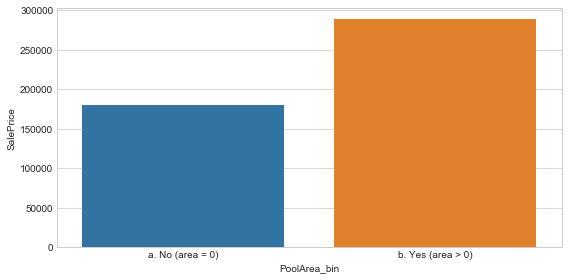

In [98]:
#PoolArea_bin
def func_bin (x):
    if x == 0: return 'a. No (area = 0)'
    else: return 'b. Yes (area > 0)'
df['PoolArea_bin'] = df['PoolArea'].apply(func_bin)

temp = df[df['label']=='train']
temp = pd.DataFrame(temp.groupby(['PoolArea_bin'], axis=0, as_index=False)['SalePrice'].mean())
plt.figure(figsize=(8,4))
sns.barplot(x='PoolArea_bin', y='SalePrice', data=temp)
plt.tight_layout()

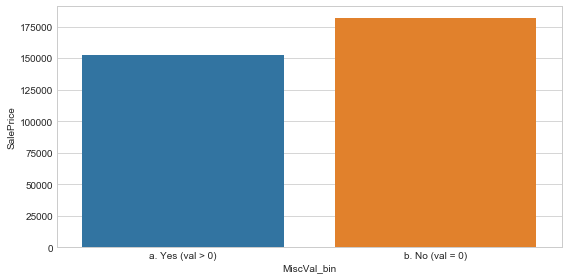

In [99]:
#MiscVal_bin
def func_bin (x):
    if x > 0: return 'a. Yes (val > 0)'
    else: return 'b. No (val = 0)'
df['MiscVal_bin'] = df['MiscVal'].apply(func_bin)

temp = df[df['label']=='train']
temp = pd.DataFrame(temp.groupby(['MiscVal_bin'], axis=0, as_index=False)['SalePrice'].mean())
plt.figure(figsize=(8,4))
sns.barplot(x='MiscVal_bin', y='SalePrice', data=temp)
plt.tight_layout()

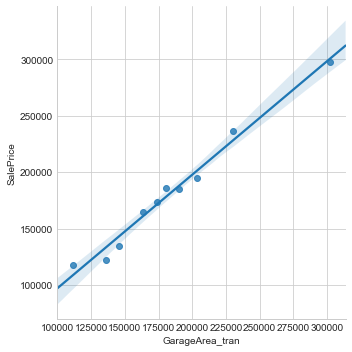

In [100]:
#GarageArea_tran
df['GarageArea_bins'] = pd.qcut(df['GarageArea'], 10, labels=False)

def func_tran (x):
    return 95076 * math.exp(0.0013 * x)
df['GarageArea_tran'] = df['GarageArea'].apply(func_tran)

temp = df[df['label']=='train']
temp = pd.DataFrame(temp.groupby(['GarageArea_bins'], axis=0, as_index=False)[['SalePrice','GarageArea_tran']].mean())
plt.figure(figsize=(8,4))
sns.lmplot(x='GarageArea_tran', y='SalePrice', data=temp)
plt.tight_layout()

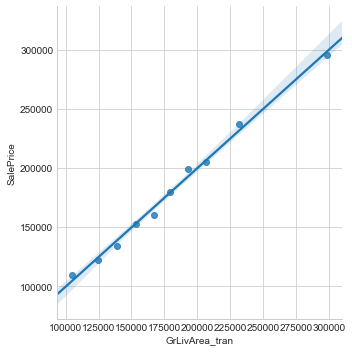

In [101]:
#GrLivArea_tran
df['GrLivArea_bins'] = pd.qcut(df['GrLivArea'], 10, labels=False)

def func_tran (x):
    return 109.08 * x + 15616
df['GrLivArea_tran'] = df['GrLivArea'].apply(func_tran)

temp = df[df['label']=='train']
temp = pd.DataFrame(temp.groupby(['GrLivArea_bins'], axis=0, as_index=False)[['SalePrice','GrLivArea_tran']].mean())
plt.figure(figsize=(8,4))
sns.lmplot(x='GrLivArea_tran', y='SalePrice', data=temp)
plt.tight_layout()

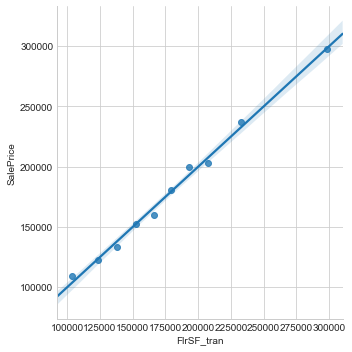

In [102]:
#FlrSF_tran
df['FlrSF'] = df['1stFlrSF'] + df['2ndFlrSF']
df['FlrSF_bins'] = pd.qcut(df['FlrSF'], 10, labels=False)

def func_tran (x):
    return 111.16 * x + 13109
df['FlrSF_tran'] = df['FlrSF'].apply(func_tran)

temp = df[df['label']=='train']
temp = pd.DataFrame(temp.groupby(['FlrSF_bins'], axis=0, as_index=False)[['SalePrice','FlrSF_tran']].mean())
plt.figure(figsize=(8,4))
sns.lmplot(x='FlrSF_tran', y='SalePrice', data=temp)
plt.tight_layout()

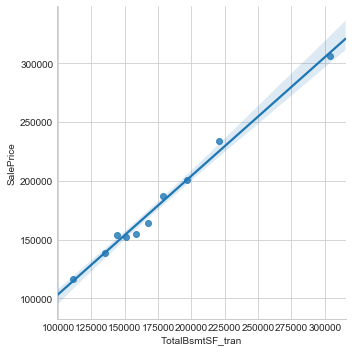

In [103]:
#TotalBsmtSF_tran
df['TotalBsmtSF_bins'] = pd.qcut(df['TotalBsmtSF'], 10, labels=False)

def func_tran (x):
    return 89702 * math.exp(0.0006 * x)
df['TotalBsmtSF_tran'] = df['TotalBsmtSF'].apply(func_tran)

temp = df[df['label']=='train']
temp = pd.DataFrame(temp.groupby(['TotalBsmtSF_bins'], axis=0, as_index=False)[['SalePrice','TotalBsmtSF_tran']].mean())
plt.figure(figsize=(8,4))
sns.lmplot(x='TotalBsmtSF_tran', y='SalePrice', data=temp)
plt.tight_layout()

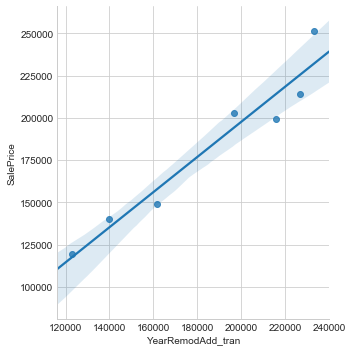

In [104]:
#YearRemodAdd_tran
df['YearRemodAdd_bins'] = pd.qcut(df['YearRemodAdd'], 7, labels=False)

def func_tran (x):
    return 0.00004 * math.exp(0.0112 * x)
df['YearRemodAdd_tran'] = df['YearRemodAdd'].apply(func_tran)

temp = df[df['label']=='train']
temp = pd.DataFrame(temp.groupby(['YearRemodAdd_bins'], axis=0, as_index=False)[['SalePrice','YearRemodAdd_tran']].mean())
plt.figure(figsize=(8,4))
sns.lmplot(x='YearRemodAdd_tran', y='SalePrice', data=temp)
plt.tight_layout()

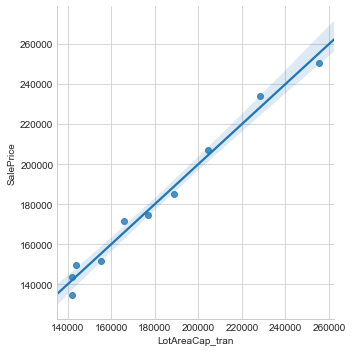

In [105]:
#LotAreaCap_tran
def func_cap (x):
    if x < 7500: return 7500
    elif x > 15000: return 15000
    else: return x
df['LotAreaCap'] = df['LotArea'].apply(func_cap)

df['LotAreaCap_bins'] = pd.qcut(df['LotArea'], 10, labels=False)

def func_tran (x):
    return 15.232 * x + 27885
df['LotAreaCap_tran'] = df['LotAreaCap'].apply(func_tran)

temp = df[df['label']=='train']
temp = pd.DataFrame(temp.groupby(['LotAreaCap_bins'], axis=0, as_index=False)[['SalePrice','LotAreaCap_tran']].mean())
plt.figure(figsize=(8,4))
sns.lmplot(x='LotAreaCap_tran', y='SalePrice', data=temp)
plt.tight_layout()

# Train Test Split

In [106]:
#Cleaning dataset and getting the dummies
#temp = df[['Id','SalePrice','label',
#           'MSSubClass_bin','MSZoning_bin','LotShape_bin','LotConfig_bin','Utilities_bin','Neighborhood_bin',
#           'BldgType_bin','HouseStyle_bin','OverallCond_bin','ExterCond_bin','ExterQual_bin','Foundation_bin',
#           'BsmtCond_bin','BsmtQual_bin','Heating_bin','HeatingQC_bin','CentralAir_bin','Electrical_bin',
#           'FullBath_bin','TotRmsAbvGrd_bin','Functional_bin','GarageCars_bin','Fence_bin','MiscFeature_bin',
#           'PoolQC_bin','SaleCondition_bin','SaleType_bin','Porch_bin','PoolArea_bin','MiscVal_bin',
#           'OverallQual_tran','GarageArea_tran','GrLivArea_tran','FlrSF_tran','TotalBsmtSF_tran','YearRemodAdd_tran','LotAreaCap_tran']].copy()
#cat_feats = ['MSSubClass_bin','MSZoning_bin','LotShape_bin','LotConfig_bin','Utilities_bin','Neighborhood_bin',
#           'BldgType_bin','HouseStyle_bin','OverallCond_bin','ExterCond_bin','ExterQual_bin','Foundation_bin',
#           'BsmtCond_bin','BsmtQual_bin','Heating_bin','HeatingQC_bin','CentralAir_bin','Electrical_bin',
#           'FullBath_bin','TotRmsAbvGrd_bin','Functional_bin','GarageCars_bin','Fence_bin','MiscFeature_bin',
#           'PoolQC_bin','SaleCondition_bin','SaleType_bin','Porch_bin','PoolArea_bin','MiscVal_bin']
temp = df[['Id','SalePrice','label',
           'GarageCars_bin','Neighborhood_bin','OverallCond_bin','PoolQC_bin',
           'OverallQual_tran','LotAreaCap_tran','YearRemodAdd_tran','FlrSF_tran']].copy()
cat_feats = ['GarageCars_bin','Neighborhood_bin','OverallCond_bin','PoolQC_bin',]
final_data = pd.get_dummies(temp,columns=cat_feats,drop_first=True)
temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 11 columns):
Id                   2919 non-null int64
SalePrice            1460 non-null float64
label                2919 non-null object
GarageCars_bin       2919 non-null object
Neighborhood_bin     2919 non-null object
OverallCond_bin      2919 non-null object
PoolQC_bin           2919 non-null object
OverallQual_tran     2919 non-null float64
LotAreaCap_tran      2919 non-null float64
YearRemodAdd_tran    2919 non-null float64
FlrSF_tran           2919 non-null float64
dtypes: float64(5), int64(1), object(5)
memory usage: 273.7+ KB


In [107]:
#Splitting the data into a train and test set 
df_train = final_data[final_data['label']=='train'].copy()
df_test = final_data[final_data['label']=='test'].copy()
df_test.drop(['Id','SalePrice','label'],axis=1,inplace=True)

x = df_train.drop(['Id','SalePrice','label'],axis=1)
y = df_train['SalePrice']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=101)

# Building the Model

In [108]:
#OLS Reg Model
x_train = sm.add_constant(x_train).copy()
lm_sm = sm.OLS(y_train, x_train)
est = lm_sm.fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     496.6
Date:                Fri, 03 Nov 2017   Prob (F-statistic):               0.00
Time:                        23:14:19   Log-Likelihood:                -12032.
No. Observations:                1022   AIC:                         2.409e+04
Df Residuals:                    1010   BIC:                         2.415e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                                                                                                coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

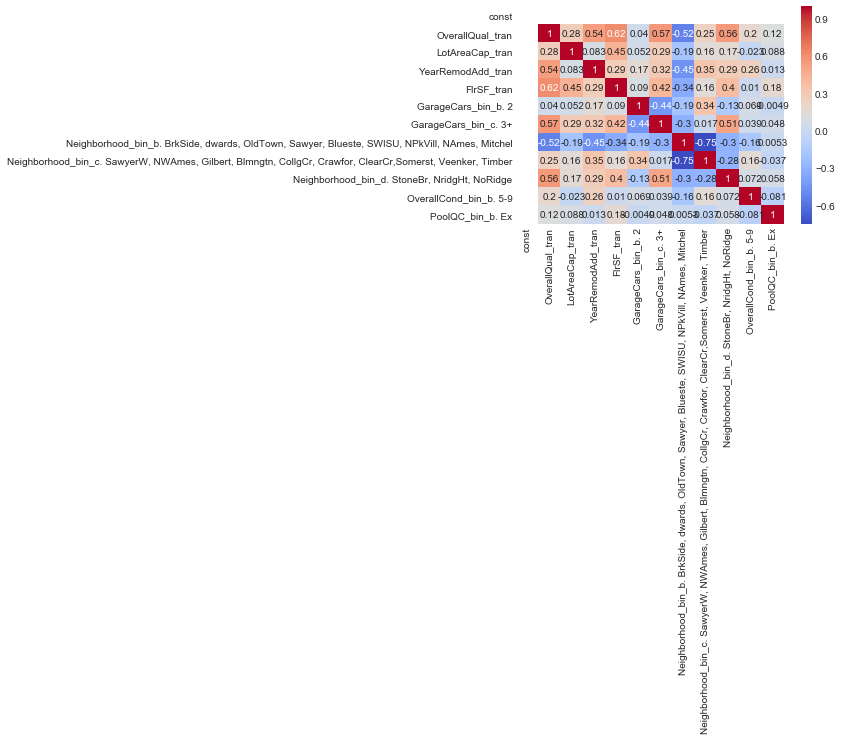

In [109]:
#Correlation matrix
sns.heatmap(x_train.corr(),cmap='coolwarm',annot=True)

# Predictions and Evaluation

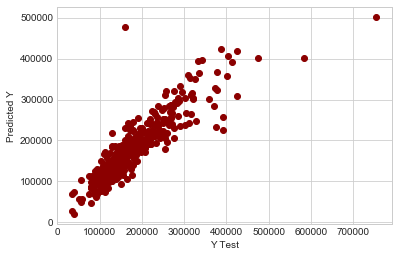

In [110]:
#Create a scatterplot of the real test values versus the predicted values.
x_test = sm.add_constant(x_test).copy()
y_pred = est.predict(x_test)

plt.scatter(y_test,y_pred,color='darkred')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [111]:
#ADDED (Train): Calculate the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error. 
predicted = est.predict(x_train)
print('MAE:', metrics.mean_absolute_error(y_train, predicted))
print('MSE:', metrics.mean_squared_error(y_train, predicted))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, predicted)))

MAE: 21321.1543644
MSE: 984736679.336
RMSE: 31380.5143256


In [112]:
#ADDED (Test): Calculate the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error. 
predicted = est.predict(x_test)
print('MAE:', metrics.mean_absolute_error(y_test, predicted))
print('MSE:', metrics.mean_squared_error(y_test, predicted))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predicted)))

MAE: 23260.2902748
MSE: 1344219745.0
RMSE: 36663.6024553


# Final Submission

In [113]:
df_test = sm.add_constant(df_test).copy()
y_pred = est.predict(df_test)

df_test = final_data[final_data['label']=='test'].copy()
df_test.drop(['SalePrice'],axis=1,inplace=True)

test_calc = pd.concat([df_test,pd.DataFrame(y_pred)],axis=1)
test_calc.rename(columns={0: 'SalePrice'}, inplace=True)
test_calc.head()

,Id,label,OverallQual_tran,LotAreaCap_tran,YearRemodAdd_tran,FlrSF_tran,GarageCars_bin_b. 2,GarageCars_bin_c. 3+,"Neighborhood_bin_b. BrkSide, dwards, OldTown, Sawyer, Blueste, SWISU, NPkVill, NAmes, Mitchel","Neighborhood_bin_c. SawyerW, NWAmes, Gilbert, Blmngtn, CollgCr, Crawfor, ClearCr,Somerst, Veenker, Timber","Neighborhood_bin_d. StoneBr, NridgHt, NoRidge",OverallCond_bin_b. 5-9,PoolQC_bin_b. Ex,SalePrice
0,1461,test,130265.442068,204911.304,138215.438609,112708.36,0,0,1,0,0,1,0,118698.480077
1,1462,test,167113.668528,245199.944,133648.553191,160840.64,0,0,1,0,0,1,0,162755.275770
2,1463,test,130265.442068,238543.560,209183.868159,194188.64,1,0,0,1,0,1,0,185721.945070
3,1464,test,167113.668528,179869.896,209183.868159,191409.64,1,0,0,1,0,1,0,183159.201383
4,1465,test,275028.363060,142125.000,195588.628062,155393.80,1,0,0,0,1,1,0,243706.984425


In [114]:
final_sub = test_calc[['Id','SalePrice']]
final_sub.to_csv('house_prices_f2005636.csv', index=False)